## Trying to understand neural network from scratch or
    
trying to build autograd,
autograd is just what implements backpropagation. we have already discussed how to calculate backpropagation and its importance in neural network, in the previous notebook. in this notebook I am trying to write a MNIST classifier in which we have to write backpropagation from scratch. we will look at next step later i guess

i guess I just need to build **multi layer perceptron** lol for classification

Lets refresh what a derivative is

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

lets define simple function

In [ ]:
def f(x):
  return 3*x**2 - 4*x + 5

In [ ]:
f(3.0)

20.0

In [ ]:
#lets say
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [ ]:
#lets pass xs to our function
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

if we plot xs and ys (in terms of math books x and y)

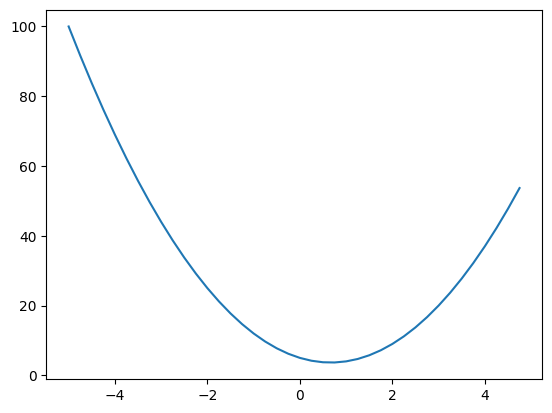

In [ ]:
plt.plot(xs, ys)

now if we think of derivative

In [ ]:
h = 0.0001
x = 3.0
(f(x+h) - f(x))/ h

14.000300000063248

now, even if you apply 3 to derivative of function `3x^2-4x+5`, which is  `6x-4`, we get the same value which is approximately `14` and if we do x = -3 and apply it

In [ ]:
h = 0.0001
x = -3.0
(f(x+h) - f(x))/ h

-21.999700000066014

whcih is almost same value if apply -3 to `6x-4`.
To understand what is slop, why slop why limit this [chat](https://chatgpt.com/share/1114fff9-b4cc-49f8-be48-2f42df9fc477) might help you.
we have already discussed about negetive and positive slop and its impact in the previous notebook.


I never imagined this would and this type of media would help me understand derivative so easily, i recommend all of you to watch [this](https://x.com/nominalthoughts/status/1762004749040447932)

###Derivative of function with multiple inputs

in the previous notebook i have explained how we calculate derivative of function with multiple inputs, and in the chat that I had shared you could have already seen how slight change in `w` and `b` changes output; lets dive deeper into it

In [ ]:
h = 0.0001


#inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a = a +h
d2  = a * b + c

print(d1)
print(d2)

4.0
3.999699999999999


Now if you normally see, you might get a feeling that adding `h` might increase the value of d, but since b is negetive which is `-3` adding more h to a will decrease the valu [` (a + h)b +c = (2+0.0001)(-3) + 10 = 3.9999999`  ]

In [ ]:
#slop
print('slop', (d2 - d1)/ h)

slop -3.000000000010772


So, if you see previous notebook also, the deriative of d with respect to a just gives b, where the value is already -3 (we have already discussed how to calculate this with formula in previous notebook)


now if want to check what does b do, and how does change in value of b affects the d

In [ ]:
a = 2.0
b = -3.0
c = 10.0

d1 = a * b +c
b = b +h
d2  = a * b + c
print('slop', (d2 - d1)/ h) #since a is positive increasing the value of b(actually increasing) increases slope value, and
#also w.r.t formula derivative of d w.r.t b itself is a. so the value of a is 2.0 alrady

slop 2.0000000000042206


if we consider the case of c, if we want the derivative of d w.r.t to c, with formula its always 1. it means value of c directly resonates in d, if we bump the value of c little bit the slope according our notebook approach shoud match the value 1

In [ ]:
a = 2.0
b = -3.0
c = 10.0

d1 = a * b +c
c = c +h
d2  = a * b + c
print('slop', (d2 - d1)/ h)

slop 0.9999999999976694


##value object

to hold the values we want a data-strucure, so lets create that

In [ ]:
class Value:
  def __init__(self, data, _children = (), _op = '', label = ''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data = {self.data})"

    '''The purpose of the __repr__ method is to provide a string representation
       of the instance. if this method isnt used the instance of this object created
        might have been looked like this <__main__.Value object at 0x7f8c45f5c8>'''

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    return out


    '''  this function helps to add those two objects
          generally we think that + add, but ot works for number
          since we are creading a data structure,  addition +  needs to be
          defined. so under the hood if we do a + b, it will do
          a.__add__(b), this function wraps addition of those two
          objects '''


  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
    return out

    '''  this method is similar to previous one but for multiplication
         a * b  does a.__mul__(b)'''

  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
      self.grad += other * (self.data ** (other -  1)) * out.grad
    out._backward = _backward
    return out

  def __rmul__(self, other):
    return self * other

  def __radd__(self, other):
    return self.__add__(other)


  def __truediv__(self, other): #self / other
    return self * other**-1


  def __neg__(self):
    return self * -1

  def __sub__(self, other):
    return self + (-other)


  def tanh(self):
    x = self.data
    t = (math.exp(2*x)- 1)/(math.exp(2*x) + 1)
    out = Value(t, (self,), 'tanh') # this method receives only one object itself, so its children is self
    def _backward():
      self.grad += (1- t**2) * out.grad
    out._backward = _backward
    return out
    '''This method helps to get the tan of a data,
      which acts like activation function, if you look at the graph
      you will get the idea'''


  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self,), 'exp')
    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward
    return out


  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()
''' initally it  was  = only, each time it was overwriting, now with += it just adds'''


' initally it  was  = only, each time it was overwriting, now with += it just adds'

In [ ]:
a = Value(2.0)
b = Value(4.0)
a - b

Value(data = -2.0)

In [ ]:
 a = Value(2.0, label = 'a')
 b = Value(-3.0, label = 'b')
 c = Value(10.0, label = 'c')
 e = a * b; e.label = 'e'
 d =  e + c; d.label = 'd'
 f = Value(-2.0, label = 'f')
 L = d * f ; L.label = 'L'

I guess, now you were able to understand why `_prev`. _prev attribute helps store  It's a set that holds references to these parent Value objects. When a new Value object is created as a result of an operation between two Value objects, the _prev attribute of the new object will contain both of the operands involved in that operation


The `_op` attribute is a string that represents the operation that was used to create the Value object. When a new Value object is created as a result of an operation between two other Value objects, _op stores a character representing that operation—'+' for addition and '*' for multiplication.


`grad` of value here represents derivative of L with respect to itself

In order to understand data and operations visually , lets write some code.

In [ ]:
# brew install graphviz
# pip install graphviz
from graphviz import Digraph


def trace(root):
  #builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child,v))
        build(child)
  build(root)
  return nodes, edges


def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})# LR = left to right



  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    #for any value in the graph, create a rectangular ('record) node for it
    dot.node(name = uid, label = "{%s|data %.4f}|grad %.4f" % (n.label, n.data, n.grad ), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      #and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    #connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


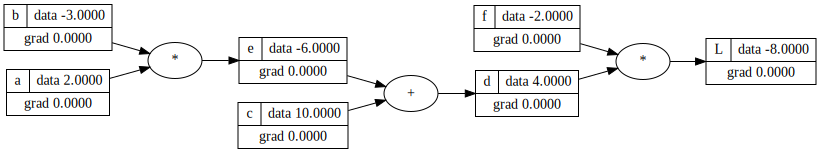

In [ ]:
draw_dot(L)

in neural networks, as you might have seen in the previous notebooks, we calculate loss, the use `loss.backward()`, where the function calculates the derivative of `w` and `b` and stores it at `w.grad` and `b.grad`. we can calucalte the derivative with respect to data but dat will always be constant, so we dont touch that

Lets do the manula backpropagation

lets calculate derivative of L with respect to d,
which says how much change in d does effects L
we know that :
L = d * f
dl/dd = ? f

(f(x+h) - f(x))/h
((d+h) *f) - (d*f))/h
(d*f) + (h*f)- (d*f)/h
(h*f)/h
f

so, conversly
dL/df = d

In [ ]:
f.grad = 4.00
d.grad = -2.00

dd/dc ? 1.0

d = c + e 1.0

f(x+h) - f(x)/h
(c + h + e - c - e) /h
remember do add h to what we are working on., i mean
if we want to find out effect of c, we have to bump c by h
h/h
1

by symmetry dd/de = 1.0

local derivative of sum equation may be 1.0 always

Now, the most important part dL/dc
how much L is sensitive to c
how does L impact from c through d
what we can think of it is, if we know how


*   d impacts L
*   c impacts d

and if we can put this both information together, there might be
some way to find put how c impacts L


dL/dc = dl/dd *dd/dc

###chain rule

Want:
dL/dc

Know:
dL/dd =  1.0
dd/dc = -2.0

dL/dc = (dL/dd) * (dd/dc)

if you have a look whatver there is before teh `+` the local derivative of them is just 1.0. so influence of them over L is in this case, dL/dc its just 2.0

In [ ]:
c.grad = -2.0 # this is not local derivative
e.grad = -2.0

In [ ]:
L.grad = 1.0

In [ ]:
def lol():

  h = 0.001

  a = Value(2.0, label = 'a')
  b = Value(-3.0, label = 'b')
  c = Value(10.0, label = 'c')
  e = a * b; e.label = 'e'
  d =  e + c; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f ; L.label = 'L'

  L1 = L.data


  a = Value(2.0 , label = 'a')
  b = Value(-3.0, label = 'b')
  c = Value(10.0, label = 'c')
  e = a * b; e.label = 'e'
  d =  e + c; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f ; L.label = 'L'
  L2 = L.data + h

  print((L2 - L1)/h)

lol()

1.000000000000334


if you can observe in the graph before the `+` node its like the derivative of d is being distributed to all the children node

Lets try to find out derivative of  a and b
b = -3.0
a =  2.0
dL / de = -2.0

e = a * b
de/da = b
de/db = a

want:
dL/da = (dL/de) * (de/da)
dL/da = -2.0 *  -3.0
`a.grad` = 6.0

dL/db = dL/de * de/db

dL/db = -2.0 * 2.0
dL/db = -4.0

In [ ]:
a.grad = 6.0
b.grad = -4.0

now we have alll the derivative,

In [ ]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-7.286496


##Manual backpropagation in a neuron

![neuron](https://gist.github.com/assets/84819735/dfa99f2f-1582-4454-bf2c-662877552e2c)

dont worry about the code in the image for now
 It consists of the following key components:

1. **Inputs (x_i)**: The neuron receives one or more input signals, denoted as x_i, which can be the raw input data or the outputs from previous layers.

2. **Weights (w_i)**: Each input is associated with a weight (w_i), which represents the importance or strength of the connection between the input and the neuron.

3. **Bias (b)**: The bias (b) is an additional parameter that shifts the activation function, allowing the neuron to model more complex relationships.

4. **Weighted Sum (Σw_i*x_i + b)**: The neuron computes the weighted sum of its inputs, where each input is multiplied by its corresponding weight, and the bias is added.

5. **Activation Function (f)**: The weighted sum is then passed through an activation function, denoted as f(). This function introduces non-linearity into the model, allowing the neural network to learn complex, non-linear relationships in the data. Common activation functions include sigmoid, ReLU (Rectified Linear Unit), tanh, and softmax.

The mathematical expression `Σw_i*x_i + b | f(activation)`, represents the core computation performed by a neuron in a deep neural network. The weighted sum of the inputs (`Σw_i*x_i + b`) is calculated, and then the result is passed through the activation function `f()` to produce the neuron's output.

This process is repeated for each neuron in the neural network, with the outputs of one layer serving as the inputs to the next layer. As the network becomes deeper, it can learn increasingly complex representations of the input data, enabling it to solve a wide range of problems, such as image recognition, natural language processing, and predictive modeling.



this is just starting part. comlpex things happen when forward and backward computation, we will look at them later, rn lets just focus on neuron

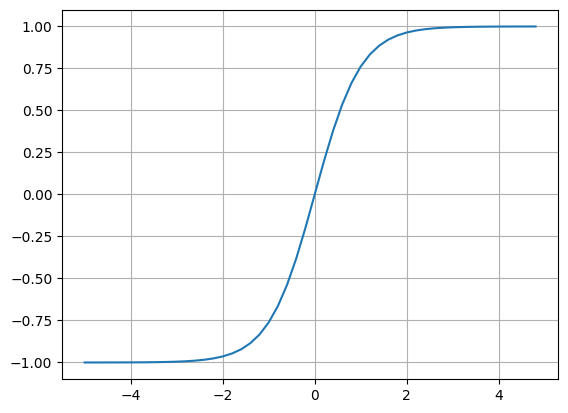

In [ ]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid() #exapmple of an activation function

In [ ]:
#inputs x1,x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

#weight w1, w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0,  label = 'w2')

#bias of the neuron
b = Value(6.8813735870195432, label = 'b')

#x1*w1 + x2 * w2 + b
x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'

#Σw_i*x_i
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

#adding bias b to what we say may be half neuron
n = x1w1x2w2 + b; n.label = 'n'

#passing through activation function tanh
o = n.tanh();o.label = 'o'

Lets calculate the derivatives

In [ ]:
o.grad = 1.0


lets calculate local derivative of tanh

In [ ]:
# o = tanh(n);  lets calculate effect of n on o i.e do/dn
#do/dn = 1- tanh(n) ** 2
#do/dn = 1- o ** 2
1 - o.data **2



0.4999999999999999

In [ ]:
n.grad = 0.5

from previous example we know that during backprop after `+` gradient just flows to previous nodes, so:

In [ ]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

similarly:

In [ ]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [ ]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data  * x1w1.grad

In [ ]:
x2.grad = w2.data * x2w2.grad #we have seen this in the previous explanation
w2.grad = x2.data * x2w2.grad

In [ ]:
o.grad = 1.0

In [ ]:
o._backward()

In [ ]:
n._backward()

In [ ]:
b._backward()

In [ ]:
x1w1x2w2._backward()

In [ ]:
x2w2._backward()

In [ ]:
x1w1._backward()

In [ ]:
o.grad  = 1.0

topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)


for node in reversed(topo):
  node._backward()


In [ ]:
o.backward()

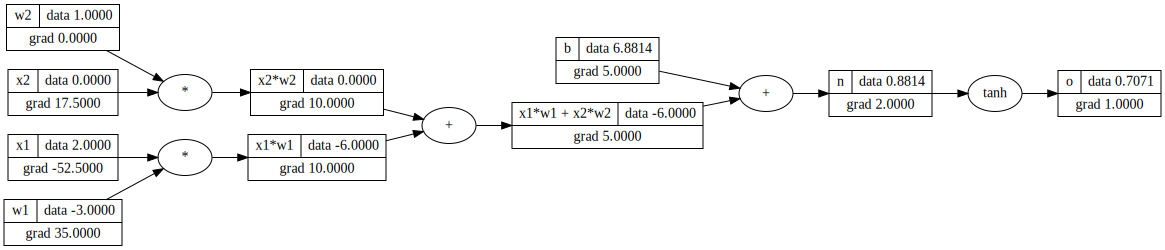

In [ ]:
draw_dot(o)

now, instead of doing it manually, lets do one thing, going through input nodes, which produced output and store the gradient with respective node

In [ ]:
#inputs x1,x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

#weight w1, w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0,  label = 'w2')

#bias of the neuron
b = Value(6.8813735870195432, label = 'b')

#x1*w1 + x2 * w2 + b
x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'

#Σw_i*x_i
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

#adding bias b to what we say may be half neuron
n = x1w1x2w2 + b; n.label = 'n'

#passing through activation function tanh
# -------------
e = (2*n).exp()
o = (e - 1)/ (e + 1)
# -------------
o.label = 'o'
o.backward()

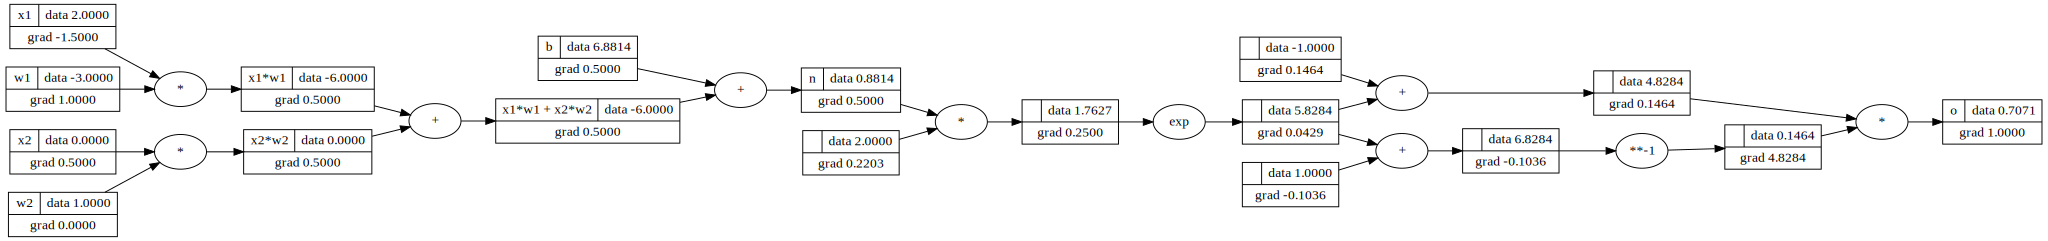

In [ ]:
draw_dot(o)

####Doing the same thing in torch

In [ ]:
import torch

In [ ]:
x1 = torch.Tensor([2.0]).double()                ;x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ;x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ;w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ;w2.requires_grad = True
b =  torch.Tensor([6.8813735870195432]).double() ;b.requires_grad = True

n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()


print('--------')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
--------
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [ ]:
torch.Tensor([[1, 2, 3], [4, 5, 6]])

tensor([[1., 2., 3.],
        [4., 5., 6.]])

by default datatype of tensor is float32; by doing double().dtype is float64 which matches python


In [ ]:
o

tensor([0.7071], dtype=torch.float64, grad_fn=<TanhBackward0>)

In [ ]:
o.data.item()

0.7071066904050358

In [ ]:
o.item()

0.7071066904050358

##building neuralnets from our class

In [ ]:
import random

In [ ]:
class Neuron:
  def __init__(self, nin):
    self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1, 1))

  def __call__(self, x):
    # w * x + b
    act = sum((wi*xi for wi, xi in zip(self.w,x)), self.b)
    out = act.tanh()
    return out

    ''' this is related to single neuron, whcih takes inputs, and multiplies with weights
    and adds single bias, for clarity look at. teh image of single neuron above'''


  def parameters(self):
    return self.w + [self.b]


class Layer:

  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]

  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs

  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]


class MLP:
  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]


  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]




In [ ]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data = -0.9865939630785188)

In [ ]:
len(n.parameters())

41

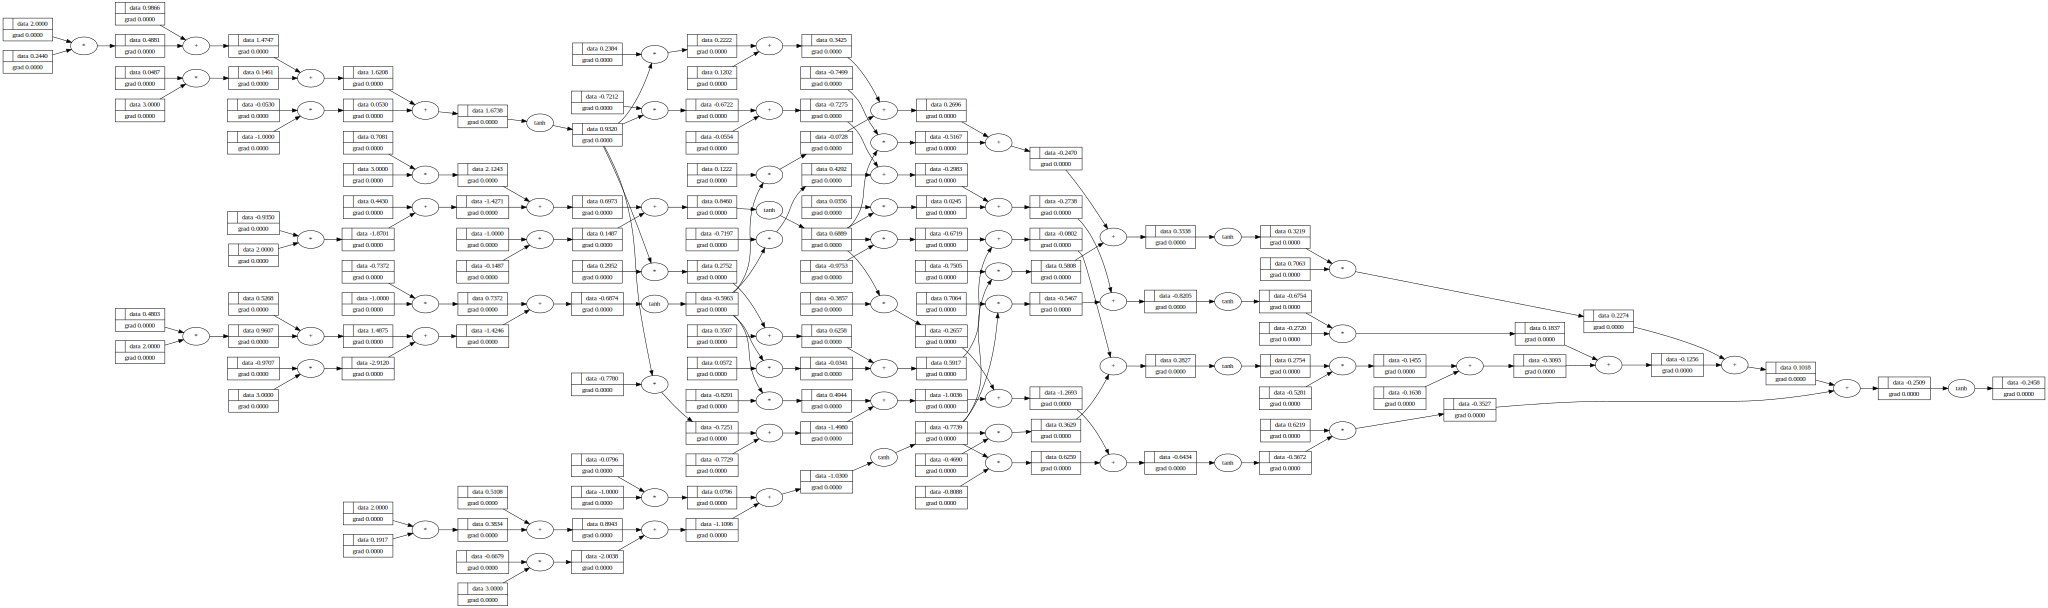

In [ ]:
draw_dot(n(x))

In [ ]:

xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0]

In [ ]:
for k in range(20):
  #forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt,yout in zip(ys, ypred))

  #backward pass
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()


  #update
  for p in n.parameters():
    p.data += -0.05 * p.grad

  print(k, loss.data, )



0 2.6272079522243044e-05
1 2.6269619121646446e-05
2 2.6267159185813874e-05
3 2.6264699714610937e-05
4 2.6262240707906475e-05
5 2.6259782165569354e-05
6 2.6257324087466054e-05
7 2.625486647346549e-05
8 2.625240932343579e-05
9 2.6249952637245915e-05
10 2.624749641476162e-05
11 2.6245040655855137e-05
12 2.6242585360389846e-05
13 2.6240130528238018e-05
14 2.6237676159267926e-05
15 2.623522225334543e-05
16 2.6232768810341265e-05
17 2.623031583012376e-05
18 2.6227863312560466e-05
19 2.622541125752056e-05


In [ ]:
ypred

[Value(data = 0.9963808234676531),
 Value(data = -0.9999975322701918),
 Value(data = -0.9999988634103453),
 Value(data = 0.9963768846135261)]